In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import math
from scipy import signal
from scipy.fftpack import fft
from scipy import ndimage
%matplotlib inline

In [2]:
def K(x,s):
    return(np.exp(-(x/s)**2))

In [3]:
klen = 40*2*2
hw = 30
xx = np.arange(klen)

sigma_c = 30
sigma_h = 36

kcxs = K(xx,sigma_c)
khxs = K(xx,sigma_h)
KH = np.zeros(klen*2-1)
KC = np.zeros(klen*2-1)
tmp = khxs[::-1]
KH[0:klen]= tmp[0:klen]
KH[klen:2*klen]=khxs[1:klen]

tmp = kcxs[::-1]
KC[0:klen]= tmp[0:klen]
KC[klen:2*klen]=kcxs[1:klen]
CS=KC-0.3*KH

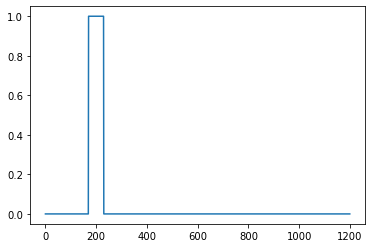

In [4]:
xlen = 1200
i0 = 200
s = np.zeros(xlen)
s[i0-hw:i0+hw] = 1
plt.plot(s)

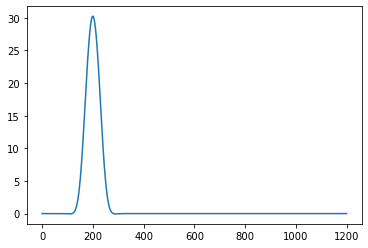

In [5]:
r = np.convolve(s,CS,'same')
plt.plot(r)

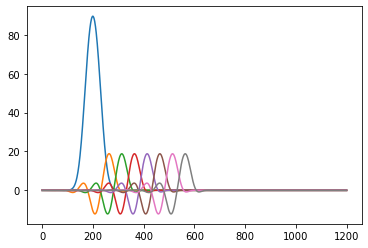

In [6]:
dt = 0.01

alpha = 80
beta = 2
k = 200
g = 2/10

nstep = 200*2
v = 1.0 # moving bar velocity

y = np.zeros(xlen) # cone cell output
z = np.zeros(xlen) # horizontal cell output


speak = np.zeros(nstep)
rpeak = np.zeros(nstep)

for i in range(nstep):
    s = np.zeros(xlen)            # stimulation array
    d = int(v*i)                  # distance travelled by the moving bar
    speak[i]= i0+d                # peak position of stimulatino
    s[i0+d-hw:i0+hw+d] = 1        # stimualation turned on for the bar position
    rs = np.convolve(s,KC,'same') # stimulation (s) convoluted with cone receptive field KC
    ry = np.convolve(y,KH,'same') # feedback from horizontal cell (y convoluted with horitonatl cell receptive field KH)
    for j in range(xlen):
        dyj =(-alpha*y[j]+k*(rs[j]-z[j]))*dt
        dzj =(-beta*z[j]+g*ry[j])*dt
        y[j] = y[j]+dyj
        z[j] = z[j]+dzj
    maxpos = np.argmax(y)
    rpeak[i]= maxpos
    if i%50 == 0:
        #plt.plot(y[maxpos-50:maxpos+50])
        plt.plot(y)
        #plt.plot(rs/7)

(413.0, 813.0)

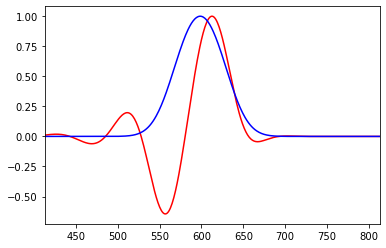

In [7]:
plt.plot(y/np.max(y),'r')
plt.plot(rs/np.max(rs),'b')
#plt.plot(z)
plt.xlim([maxpos-200,maxpos+200])

In [8]:
# activation function
def A(x,theta):
    y = np.zeros(len(x))
    for i in range(len(x)):
        if x[i]- theta>0:
            y[i]= x[i]-theta
    return(y)

(513.0, 713.0)

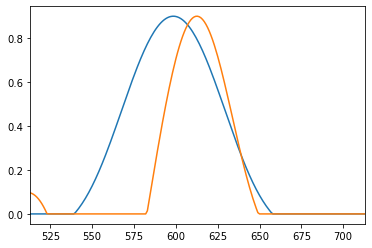

In [9]:
# shown with activatin function
rrs = rs/np.max(rs)
yy = y/np.max(y)
plt.plot(A(rrs,0.1))
plt.plot(A(yy,0.1))
plt.xlim([maxpos-100,maxpos+100])

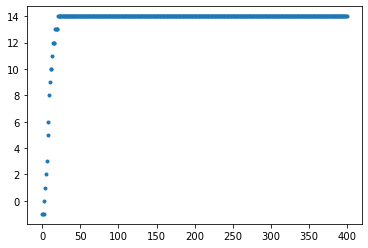

In [10]:
plt.plot(rpeak-speak,'.')

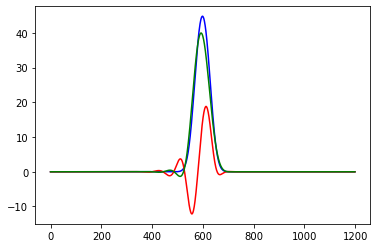

In [11]:
plt.plot(rs,'b')
plt.plot(y,'r')
plt.plot(z,'g')
